## Text analysis using WordClouds

#### What is Text analysis?

- Text analysis is the process of examining large collections of unstructured textual data, in order to generate new information. Text analysis is also known as "Text Mining".

- The Word cloud model (also known as bag of words model) is a way of extracting features (words) from text, it describes the occurrence of words within a document.

#### The Goal
The goal of this lab is to produce a Wordcloud to analyse customer feedback survey data. 

#### About the dataset
For this lab we will use the "ConsumerSentiment.xlsx" dataset. 

#### Download and Install Python Libraries

In [15]:
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib
#!pip install nltk
#!pip install wordcloud

#### Import Python Libraries

In [16]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')





#### Process map
Below illustrates a 5-step process used during this lab.

    1. Import Data
    2. Data Quality Checks
    3. Data Cleansing
    4. Data Pre-processing
    5. Visualisations



#### 1. Import Data

In [17]:
# Reading data from a Excel file and saving that data into a dataframe called "df"

df = pd.read_excel("ConsumerSentiment.xlsx")
df

,ID,Text
0,1,"My account shows a ""gift card"" balance. I did ..."
1,2,i got my invoice on one of my recent orders an...
2,3,"Hi, I have a question about returning a rented..."
3,4,I have deleted all books and it still says I h...
4,5,Amazon.com will never ask you to confirm any ...
...,...,...
2334,2335,"Jonathan says:\n(HELP FORUM PRO)\nJ., that's f..."
2335,2336,"S. Silverstein says:\nHi, not sure what happen..."
2336,2337,(HELP FORUM PRO)\nNot quite sure what you're a...
2337,2338,Stephens A. Salami says:\nWHY THIS ITEM CAN'T ...


#### 2. Data Quality Checks

    2.1 Check data
    2.2 Check shape of data
    2.3 Check for duplicates
    2.4 Check for missing values

In [18]:
# 2.1
# Viewing top 5 records

df.head()

,ID,Text
0,1,"My account shows a ""gift card"" balance. I did ..."
1,2,i got my invoice on one of my recent orders an...
2,3,"Hi, I have a question about returning a rented..."
3,4,I have deleted all books and it still says I h...
4,5,Amazon.com will never ask you to confirm any ...


In [19]:
# 2.2
# Looking at the structure of the dataframe

df.shape

(2339, 2)

In [20]:
# 2.3
# Let’s use duplicated() function to identify how many duplicate records there are in the dataset

df.duplicated().sum()

0

In [21]:
# 2.4
# This method prints out information about a dataframe including the index, dtype, columns, non-null values and memory usage
# This method is also useful for finding out missing values in a dataset
# if found, we can use interpolation techniques to rectify those missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2339 non-null   int64 
 1   Text    2337 non-null   object
dtypes: int64(1), object(1)
memory usage: 36.7+ KB


#### 3. Data Cleansing

In [22]:
# This is how you remove all the duplicates from the dataset using drop_duplicates() function

# df = df.drop_duplicates()

#### 4. Data Pre-processing

    4.1 Create the stopwords list
    4.2 create a corpus

In [23]:
# 4.1
# Create the stopwords list object called "sw"
from wordcloud import STOPWORDS

sw = set(STOPWORDS)
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [24]:
# Adding custom words to the stopwords list "sw"
sw.update(["drink", "now", "flavour"])

In [25]:
# 4.2
# combining all customer reviews to create a corpus
# this corpus will be used during the wordcloud generation process


# Converting Data in "Text" column to string
df["Text"] = df.Text.astype(str)


# Joining all reviews from "Text" column to one big text corpus --> this new object is called "tc"
tc = " ".join(n for n in df.Text)


# Count the total number of words in the corpus
print ("There are {} words in the corpus".format(len(tc)))

There are 612474 words in the corpus


In [26]:
# Explore the text corpus "tc" --> let's look at first 1000 characters
tc[0:1000]

'My account shows a "gift card" balance. I did not purchase or receive any gift card for myself. Why do I have this?  i got my invoice on one of my recent orders and im being charged for the 2 day shipping wich i thought came free with my prime account how do i rectify this Hi, I have a question about returning a rented textbook if I will not end up needing it. I want to rent an optional textbook for a class, but I might want to return it within a few weeks if it ends up not being useful. Will I get my money fully or partially returned? Thank you!!! I have deleted all books and it still says I have used 216.0 MB of storage. I have no pictures, videos, etc. It says I have some MB of storage in these, also.  Amazon.com will never ask you to confirm any personal or account information by clicking on a link from an e-mail.\n\nIf your inbox has suspicious messages and you\'re unsure if they\'re from Amazon, we strongly recommend checking out our Help page resources for this. We have put tog

#### 5. Visualisations

In [27]:
# Create the wordcloud object called "wd"
from wordcloud import WordCloud

wd = WordCloud(stopwords=sw,
               max_font_size=30, 
               max_words=100,
               random_state=45,
               background_color="white").generate(tc)




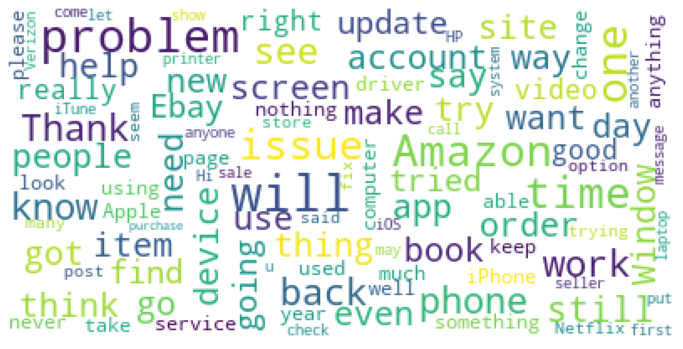

In [28]:
# Display the wordcloud using matplotlib

plt.figure(figsize=(12,10))
plt.imshow(wd)
plt.axis("off")
plt.show()

In [29]:
# Save the wordcloud as an image to the default working directory
wd.to_file("CustomerSentimentWordCloud.png")

In [30]:
# To find out the default working directory
# import os
# os.getcwd()